# OLS 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from help_functions import loadAggData

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     531.9
Date:                Thu, 16 Jan 2025   Prob (F-statistic):          2.63e-263
Time:                        00:12:15   Log-Likelihood:                -3053.8
No. Observations:                 450   AIC:                             6138.
Df Residuals:                     435   BIC:                             6199.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.397e+07   7.96e+07     -1.055      0.2

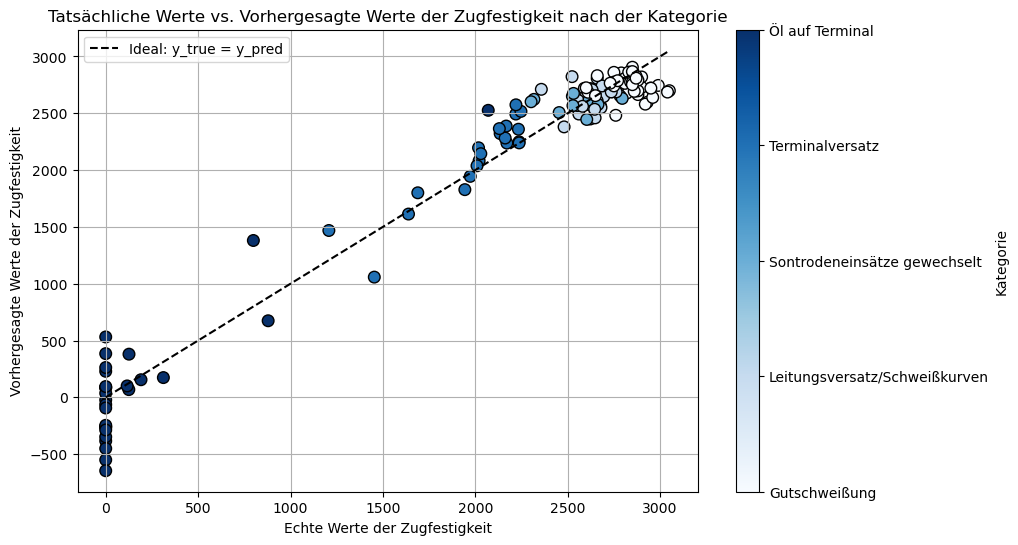

In [3]:
loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=None, normalize=False)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model = sm.OLS(y_train, x_train).fit()
y_pred = model.predict(x_test)
print(model.summary())
loader.regression_statistics(y_test, y_pred,rescale = False)
loader.plot_regression_results(y_test, y_pred,rescale = False)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              3503.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):                        0.00
Time:                        00:15:34   Log-Likelihood:                         -3357.7
No. Observations:                 450   AIC:                                      6723.
Df Residuals:                     446   BIC:                                      6740.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

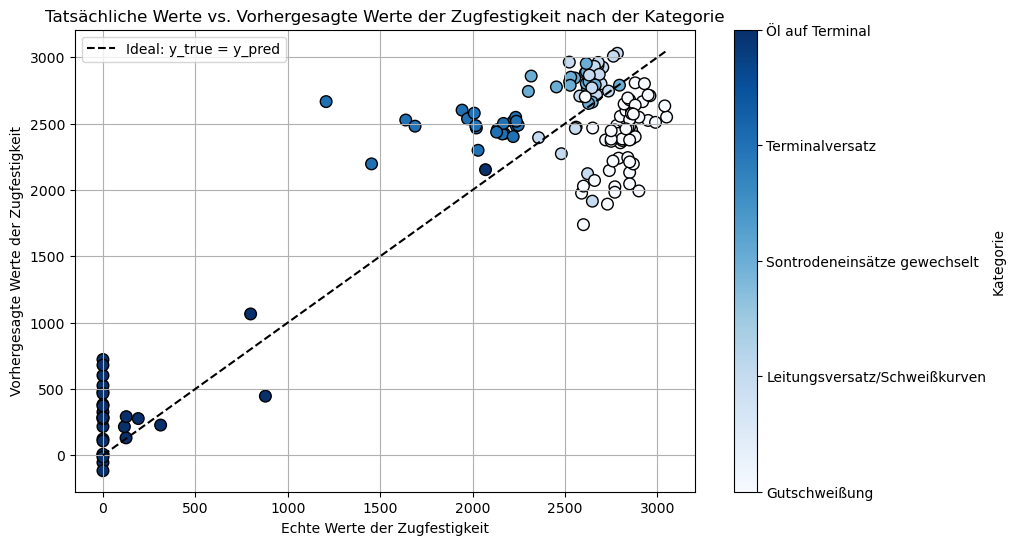

In [6]:

loader = loadAggData()
filter_c = ["P_med", "F_med", "D_med", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=False)

model_sig = sm.OLS(y_train, x_train).fit()
y_pred = model_sig.predict(x_test)

print(model_sig.summary())
loader.regression_statistics(y_test, y_pred,rescale = False)
loader.plot_regression_results(y_test, y_pred,rescale = False)

**Noch immer ein Problem mit starker Multikolliearität**

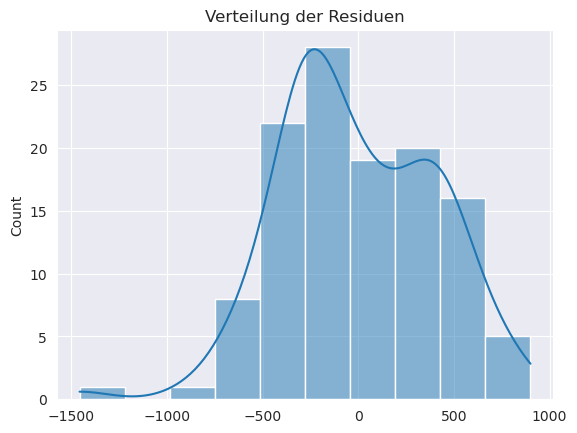

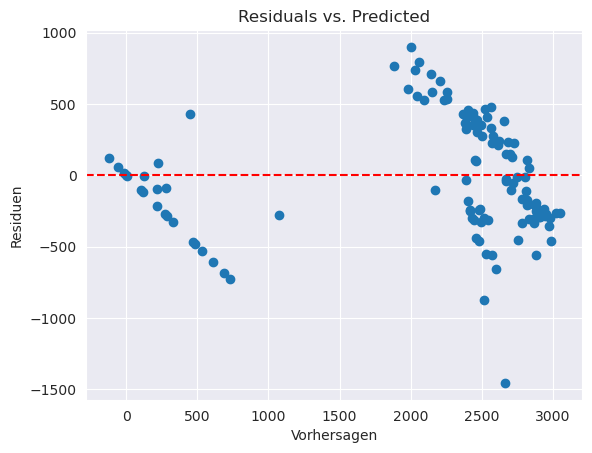

In [6]:
residuals = y_test - y_pred_sig
sns.histplot(residuals, kde=True)
plt.title("Verteilung der Residuen")
plt.show()

# Residuen vs. Vorhersagen
plt.scatter(y_pred_sig, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs. Predicted")
plt.xlabel("Vorhersagen")
plt.ylabel("Residuen")
plt.show()

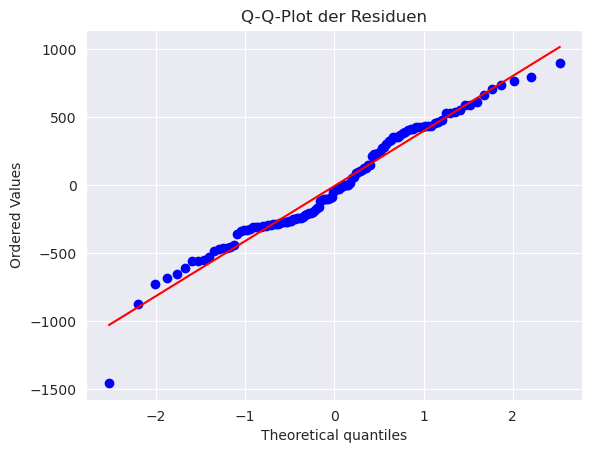

In [7]:
residuals = y_test - y_pred_sig

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q-Plot der Residuen")
plt.show()

In [8]:
X_sig = x_train[significant_predictors]
X_sig = sm.add_constant(X_sig)

vif_data = pd.DataFrame()
vif_data["Variable"] = X_sig.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_sig.values, i) for i in range(X_sig.shape[1])
]

print(vif_data)

  Variable          VIF
0    const  6615.456469
1    P_med     7.757559
2    F_med     1.156215
3    D_med     2.471683
4    T_sum    11.049885


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              2626.
Date:                Thu, 16 Jan 2025   Prob (F-statistic):                   2.17e-283
Time:                        00:15:56   Log-Likelihood:                         -3482.3
No. Observations:                 450   AIC:                                      6971.
Df Residuals:                     447   BIC:                                      6983.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

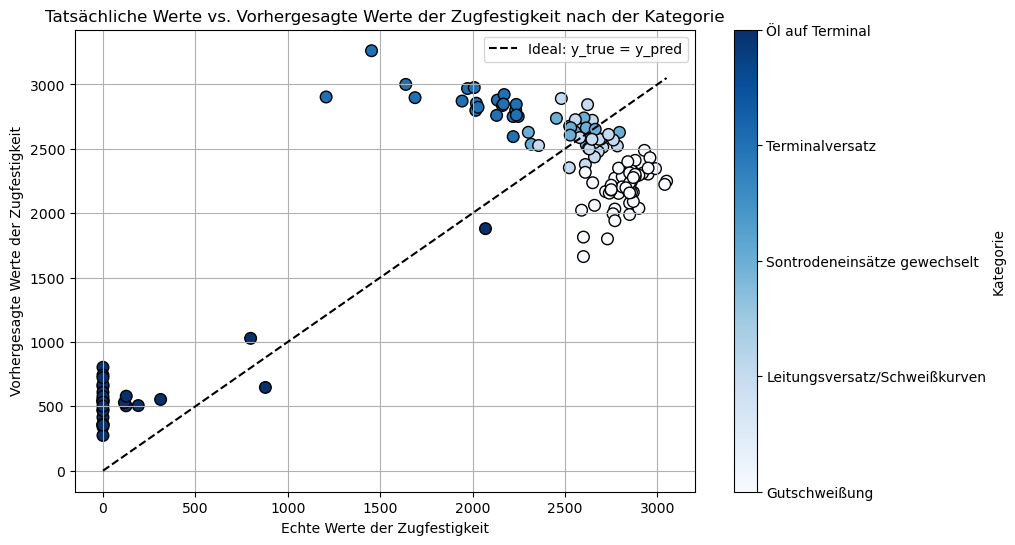

In [7]:
loader = loadAggData()
significant_predictors = ["P_med", "F_med", "D_med"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=significant_predictors, normalize=False)

model_sig = sm.OLS(y_train, x_train).fit()
y_pred = model_sig.predict(x_test)
print(model_sig.summary())
loader.regression_statistics(y_test, y_pred,rescale = False)
loader.plot_regression_results(y_test, y_pred,rescale = False)

# Generalized Linear Model

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  450
Model:                            GLM   Df Residuals:                      435
Model Family:                Gaussian   Df Model:                           14
Link Function:               Identity   Scale:                          47504.
Method:                          IRLS   Log-Likelihood:                -3053.8
Date:                Thu, 16 Jan 2025   Deviance:                   2.0664e+07
Time:                        00:17:09   Pearson chi2:                 2.07e+07
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.397e+07   7.96e+07     -1.055      0.2

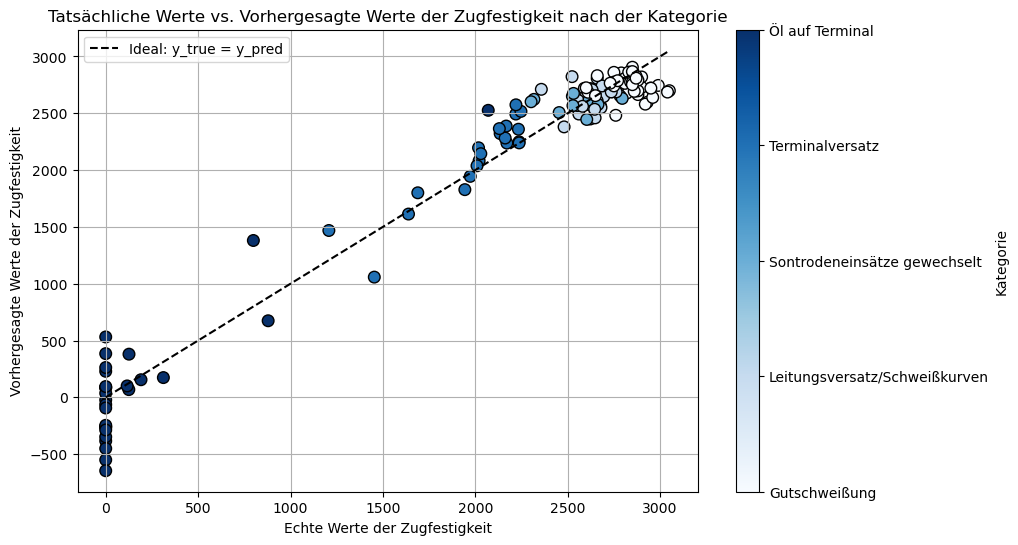

In [8]:
loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=None, normalize=False)


x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model_glm = sm.GLM(y_train, x_train).fit()
y_pred_glm = model_glm.predict(x_test)
print(model_glm.summary())
loader.regression_statistics(y_test, y_pred_glm,rescale = False)
loader.plot_regression_results(y_test, y_pred_glm,rescale = False)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  450
Model:                            GLM   Df Residuals:                      435
Model Family:                   Gamma   Df Model:                           14
Link Function:                    log   Scale:                          1.2985
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 16 Jan 2025   Deviance:                       2911.9
Time:                        00:25:13   Pearson chi2:                     565.
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.65e+06   4.16e+05      3.967      0.0

/home/david/miniconda3/envs/BIAFO/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/david/miniconda3/envs/BIAFO/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/home/david/miniconda3/envs/BIAFO/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


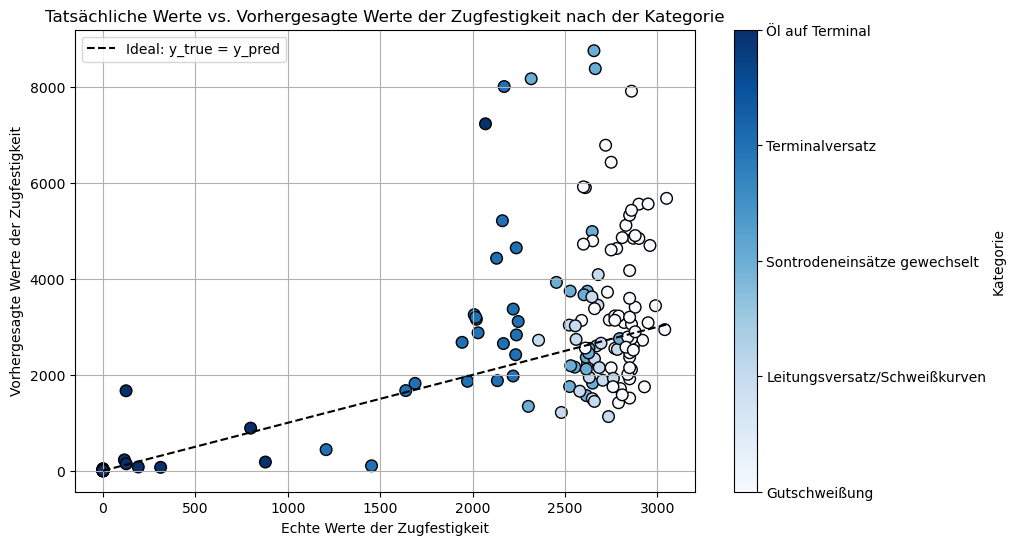

In [15]:
loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=None, normalize=False)


# Konstanten hinzufügen
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# GLM-Modell erstellen
# Beispiel: Gamma-Familie mit log-Link (angepasst je nach Bedarf)
model_glm = sm.GLM(y_train, x_train, family=sm.families.Gamma(link=sm.families.links.log()))
result_glm = model_glm.fit()

# Vorhersagen erstellen
y_pred_glm = result_glm.predict(x_test)

# Modellzusammenfassung
print(result_glm.summary())

# Modellstatistiken berechnen und anzeigen
loader.regression_statistics(y_test, y_pred_glm,rescale = False)
loader.plot_regression_results(y_test, y_pred_glm,rescale = False)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  450
Model:                            GLM   Df Residuals:                      435
Model Family:                   Gamma   Df Model:                           14
Link Function:           InversePower   Scale:                         0.23557
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Thu, 16 Jan 2025   Deviance:                       2769.7
Time:                        00:27:07   Pearson chi2:                     102.
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.8245     89.238      0.895      0.3

/home/david/miniconda3/envs/BIAFO/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/david/miniconda3/envs/BIAFO/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
/home/david/miniconda3/envs/BIAFO/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


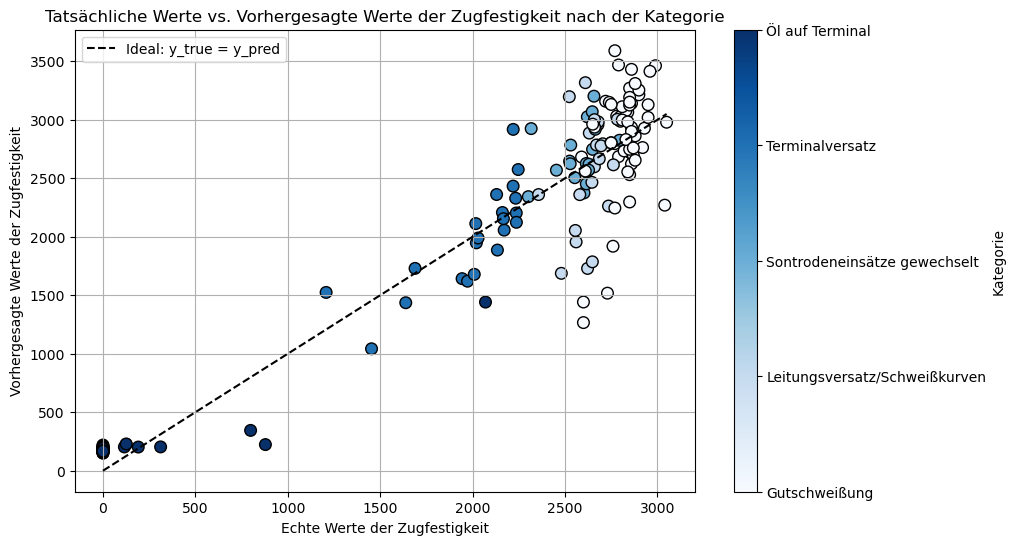

In [18]:
loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=None, normalize=False)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


model_glm = sm.GLM(y_train, x_train, family=sm.families.Gamma(link=sm.families.links.InversePower()))
result_glm = model_glm.fit()


y_pred_glm = result_glm.predict(x_test)


print(result_glm.summary())

loader.regression_statistics(y_test, y_pred_glm,rescale = False)
loader.plot_regression_results(y_test, y_pred_glm,rescale = False)


# Rigde Regression



+------+---------+---------+------+
|  R²  |   MAE   |   RSME  | MAPE |
+------+---------+---------+------+
| 0.96 | 145.704 | 203.841 | 8.21 |
+------+---------+---------+------+


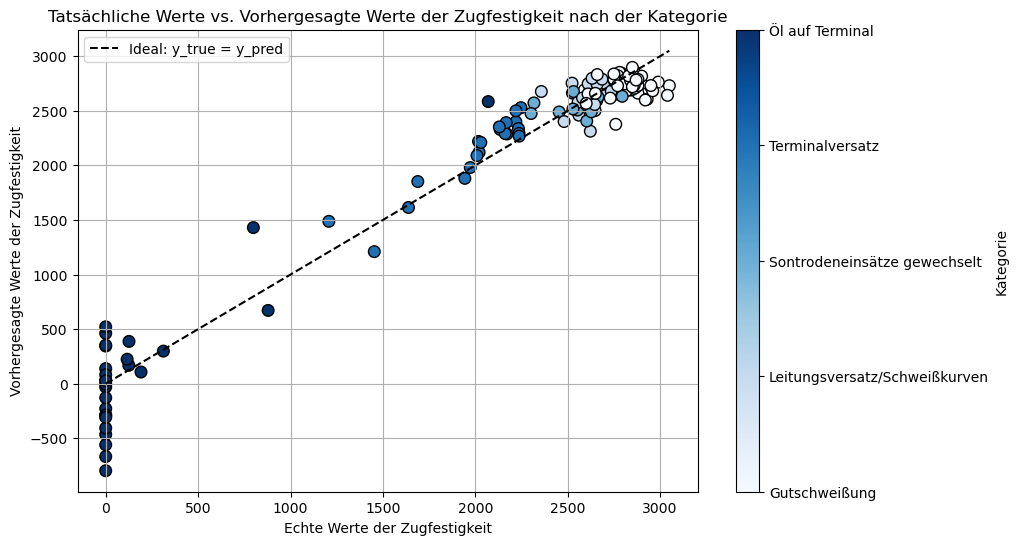

In [21]:
from sklearn.linear_model import Ridge

loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=None, normalize=False)

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)

loader.regression_statistics(y_test, y_pred_ridge,rescale = False)
loader.plot_regression_results(y_test, y_pred_ridge,rescale = False)



+-------+---------+---------+-------+
|   R²  |   MAE   |   RSME  |  MAPE |
+-------+---------+---------+-------+
| 0.883 | 279.317 | 347.363 | 14.81 |
+-------+---------+---------+-------+


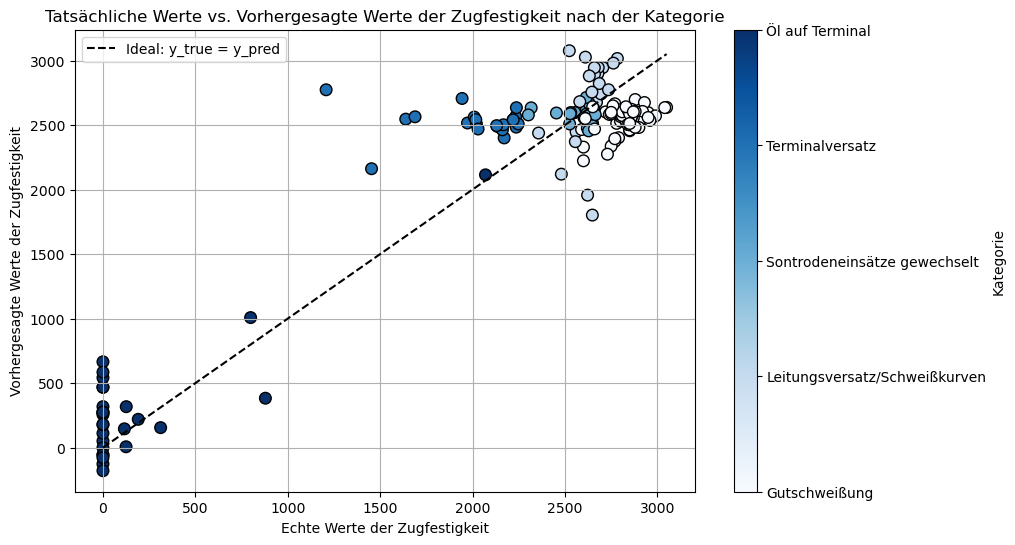

In [25]:
loader = loadAggData()
filter_c = ["F_med", "D_med", "T_sum", "P_med"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=False)

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)

loader.regression_statistics(y_test, y_pred_ridge,rescale = False)
loader.plot_regression_results(y_test, y_pred_ridge,rescale = False)



+-------+---------+---------+-------+
|   R²  |   MAE   |   RSME  |  MAPE |
+-------+---------+---------+-------+
| 0.796 | 382.115 | 458.267 | 21.04 |
+-------+---------+---------+-------+


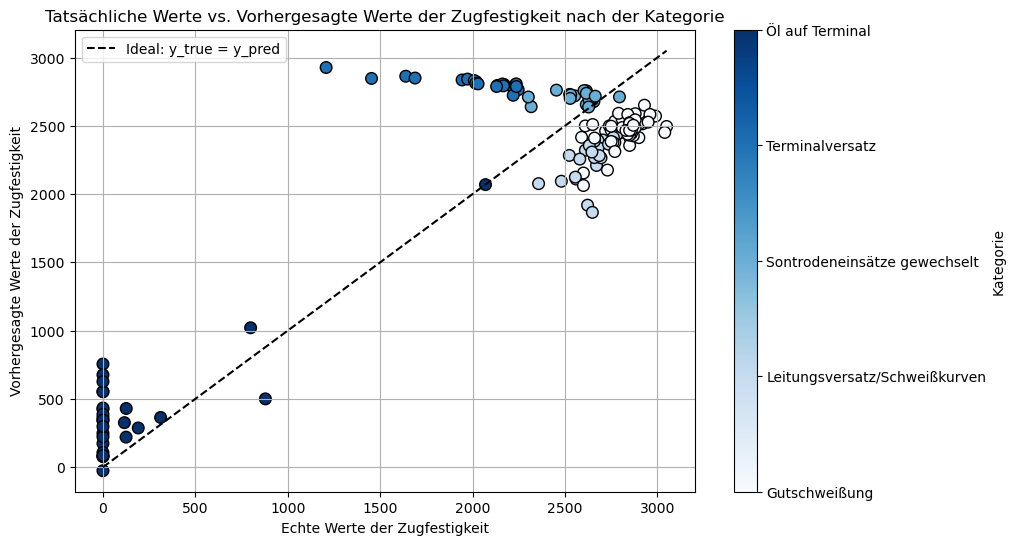

In [30]:

loader = loadAggData()
filter_c = ["F_med", "T_sum", "P_med"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=False)

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)

loader.regression_statistics(y_test, y_pred_ridge,rescale = False)
loader.plot_regression_results(y_test, y_pred_ridge,rescale = False)

Ridge Regression funtioniert mit den ausgewählten Parametern nicht gut.

# Lasso Regression



+-------+---------+---------+-------+
|   R²  |   MAE   |   RSME  |  MAPE |
+-------+---------+---------+-------+
| 0.796 | 381.688 | 458.132 | 21.03 |
+-------+---------+---------+-------+


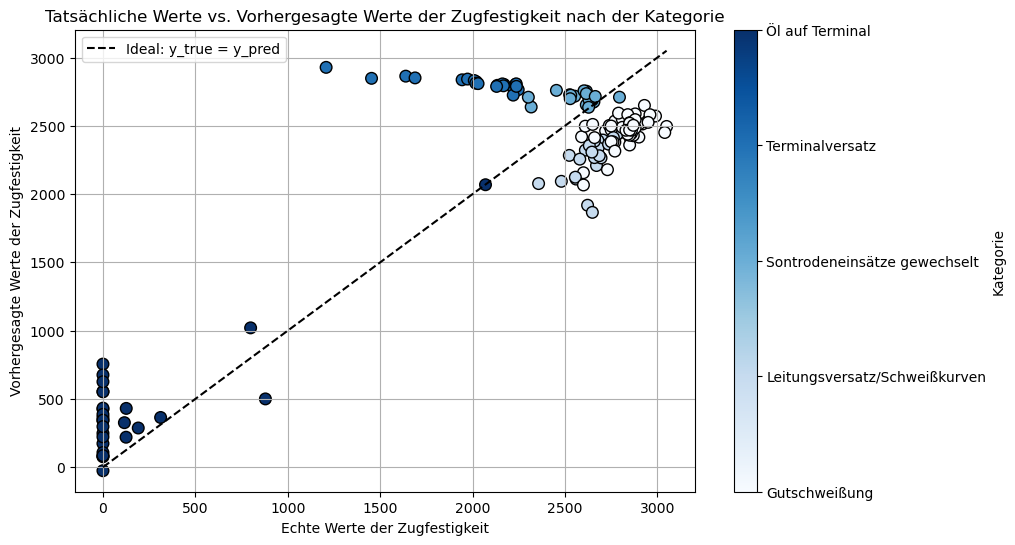

In [28]:
from sklearn.linear_model import Lasso

loader = loadAggData()
filter_c = ["F_med", "T_sum", "P_med"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=False)

lasso = Lasso(alpha=10, max_iter=100000)
lasso.fit(x_train, y_train)

y_pred_lasso = lasso.predict(x_test)

loader.regression_statistics(y_test, y_pred_lasso,rescale = False)
loader.plot_regression_results(y_test, y_pred_lasso,rescale = False)

Problem ist wahrscheinlich die Multikollinearität.



+------+---------+--------+-------+
|  R²  |   MAE   |  RSME  |  MAPE |
+------+---------+--------+-------+
| 0.88 | 280.835 | 351.88 | 14.93 |
+------+---------+--------+-------+


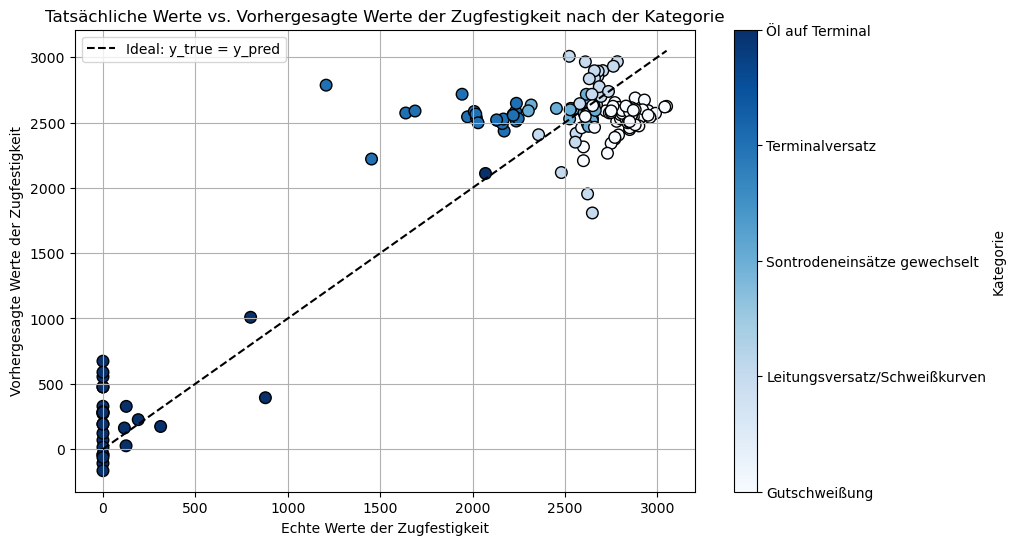

In [33]:
from sklearn.linear_model import Lasso

loader = loadAggData()
filter_c = ["F_med", "D_med", "T_sum", "P_med"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=False)

lasso = Lasso(alpha=10, max_iter=1000)
lasso.fit(x_train, y_train)

y_pred_lasso = lasso.predict(x_test)

loader.regression_statistics(y_test, y_pred_lasso,rescale = False)
loader.plot_regression_results(y_test, y_pred_lasso,rescale = False)

# Die linearen Regressionsmodelle scheinen auch nicht so gut zu funktionieren